# Домашнее задание. Обработка изображений.
Данные, необходимые для этого модуля:
* cat-bw.png
* cat-color.png

Задание: Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [146]:
np.__version__

'1.20.3'

## Рельефный фильтр

Исходное изображение

In [147]:
img = imageio.imread('cat-bw.png')
img = img[:,:,0].astype(np.float32) / 255.
print(img.shape)

(667, 730)


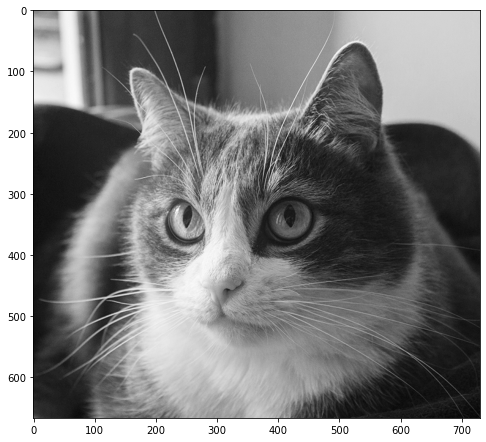

In [148]:
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')

## Оконная функция (функция фильтра)
Фильтр формирует изображение похожее на гравюру

In [151]:
def relief_filter(x):
    w = np.array([[2, 0, 0],[0, -1, 0], [0, 0, -1]])
    return np.sum(w*x)

## Оконная обработка изображения (фильтрация)

In [158]:
%%time

win_size = (3, 3) # размер окна

out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = relief_filter(x)

CPU times: user 10.4 s, sys: 0 ns, total: 10.4 s
Wall time: 10.4 s


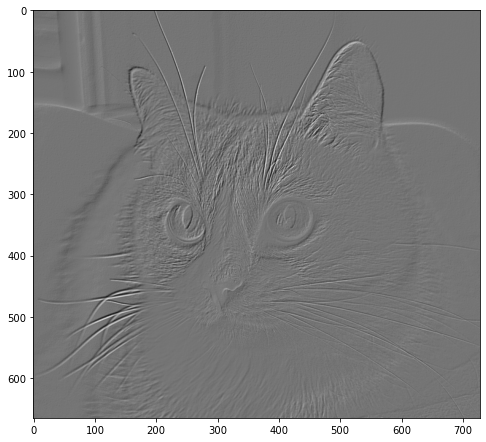

In [159]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')

## Свёртка через библиотеку scipy.signal
На самом деле, то, что мы делаем, называется "корреляция". Настоящая свёртка отражает ядро свёртки по всем измерениям. Но зачастую под свёрткой понимают именно корреляцию. А в случае симметричного ядра свёртки они эквивалентны.

In [154]:
import scipy.signal

In [156]:
w = np.array([[2, 0, 0],
              [0, -1, 0],
              [0, 0, -1]])

In [160]:
%%time

out_img = scipy.signal.correlate2d(img, w, mode='valid')

CPU times: user 18.4 ms, sys: 9 µs, total: 18.4 ms
Wall time: 17.7 ms


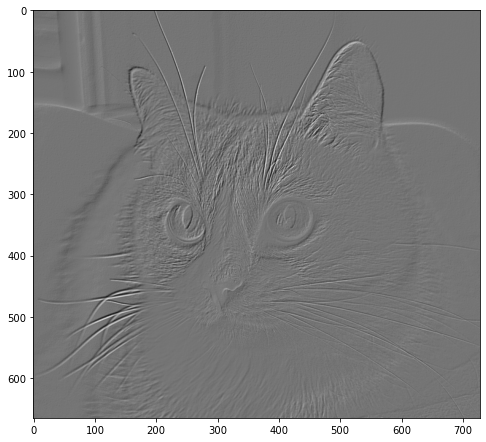

In [161]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')

## Загрузка цветного изображения

Проверим для цветного изображения

In [162]:
img = imageio.imread('cat-color.png')
img = img.astype(np.float32) / 255.
print(img.shape)

(667, 730, 3)


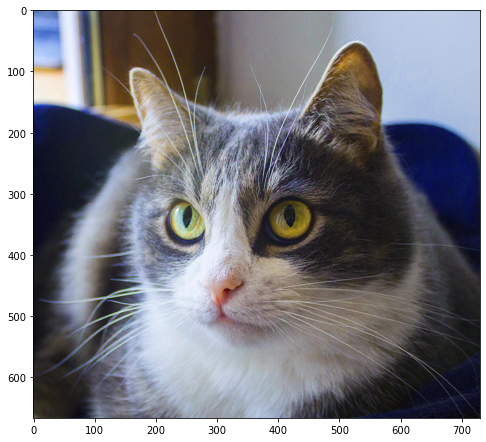

In [163]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

## Свёртка цветного изобрежения
Двумерная свёртка применяется поканально.

In [188]:
%%time

out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:, c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

CPU times: user 56.1 ms, sys: 0 ns, total: 56.1 ms
Wall time: 54.9 ms


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


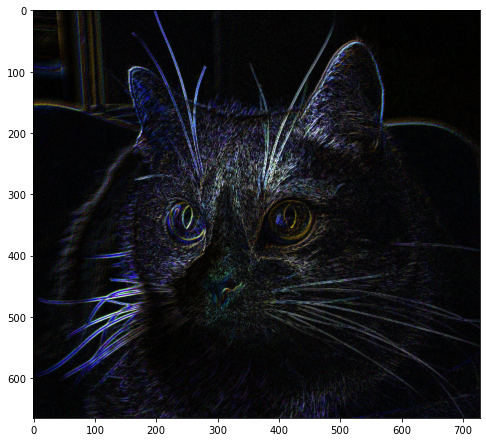

In [189]:
plt.figure(figsize=(8, 8))
plt.imshow(np.abs(out_img))

Мило

### Пробы работы с HSV

In [185]:
from skimage.color import rgb2hsv, hsv2rgb

In [190]:
img_hsv = rgb2hsv(out_img)

/home/helgi/anaconda3/lib/python3.9/site-packages/skimage/color/colorconv.py:238: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


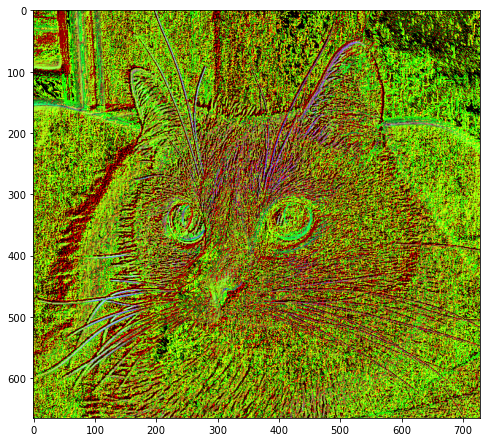

In [191]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

In [199]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] *= 2
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


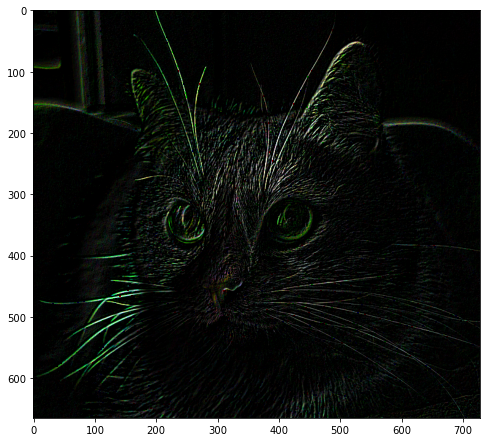

In [200]:
plt.figure(figsize=(8,8))
plt.imshow(img_new)

### Рельефная фильтрация для 3d массива (по цвету в том числе)

In [183]:
%%time

out_img = []

for c in range(3):
    res = np.zeros(
        (img.shape[0] - w.shape[0] + 1,
        img.shape[1] - w.shape[1] + 1), 
        dtype=np.float32) 
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            x = img[i:i+w.shape[0], j:j+w.shape[1]]

            res[i,j] = np.sum(w * x)
    out_img.append(res)
            
out_img = np.stack(out_img, axis=2)

CPU times: user 25.1 s, sys: 0 ns, total: 25.1 s
Wall time: 25.1 s


In [181]:
w*x

Array([[[ 0.03137255,  0.        ,  0.        ],
        [ 0.        , -0.05882353,  0.        ],
        [ 0.        ,  0.        , -0.19215687]],

       [[ 0.05490196,  0.        ,  0.        ],
        [ 0.        , -0.05098039,  0.        ],
        [ 0.        ,  0.        , -0.09019608]],

       [[ 0.16470589,  0.        ,  0.        ],
        [ 0.        , -0.09803922,  0.        ],
        [ 0.        ,  0.        , -0.03137255]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


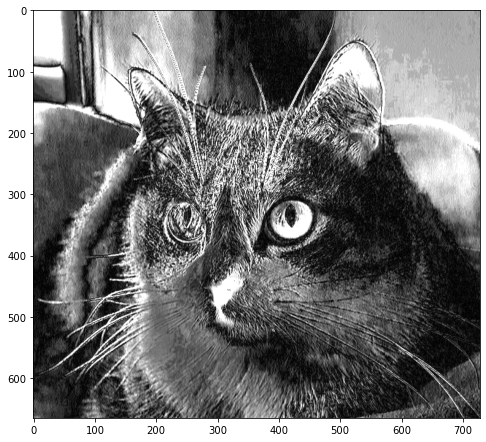

In [184]:
plt.figure(figsize=(8, 8))
plt.imshow(np.abs(out_img)) #, cmap='gray')